In [131]:
import matplotlib.pyplot as plt
import json
import os

def plot_training_history(history):
    """
    Plots training and validation accuracy and loss curves from a model history dictionary.
    
    Parameters:
        history (dict): A dictionary containing keys like 'accuracy', 'loss', 
                        'val_accuracy', and 'val_loss' — typically from model.fit().
    """
    # Extract available metrics
    acc = history.get('accuracy', [])
    val_acc = history.get('val_accuracy', [])
    loss = history.get('loss', [])
    val_loss = history.get('val_loss', [])

    epochs = range(1, len(acc) + 1)

    # --- Plot Accuracy ---
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    if val_acc:
        plt.plot(epochs, val_acc, label='Validation Accuracy', marker='x')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # --- Plot Loss ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    if val_loss:
        plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


In [132]:
history_path = os.path.join('..', 'data', '08_reporting', 'lipinski_training_history.json')
with open(history_path, 'r') as f:
    history = json.load(f)

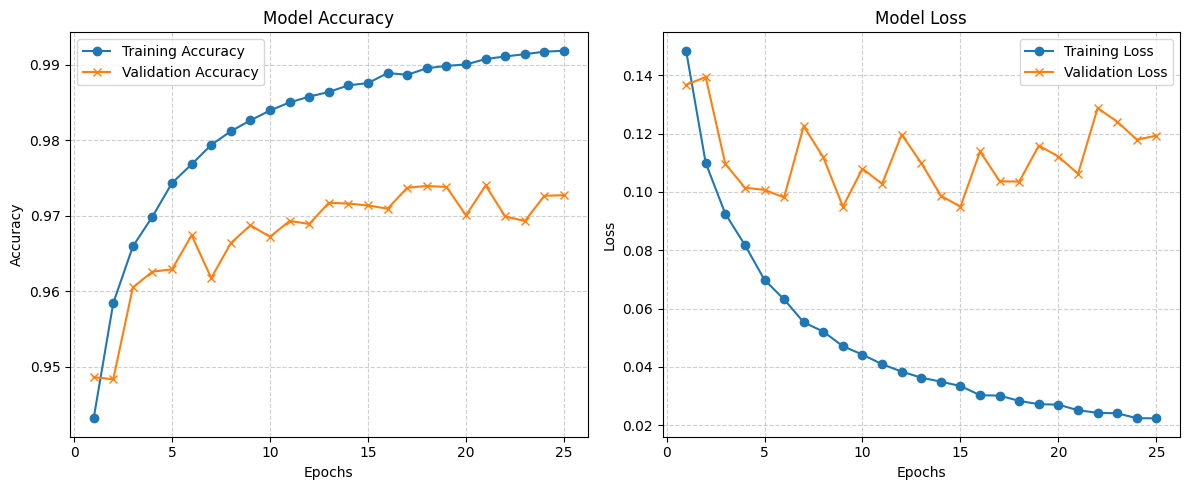

In [133]:
plot_training_history(history)

In [134]:
history

{'accuracy': [0.943135142326355,
  0.9584159851074219,
  0.965918779373169,
  0.9698740839958191,
  0.974331796169281,
  0.9768062829971313,
  0.9793735146522522,
  0.9811842441558838,
  0.9826240539550781,
  0.9839431643486023,
  0.9850007891654968,
  0.9857717156410217,
  0.9863903522491455,
  0.9872682690620422,
  0.9875659346580505,
  0.9888966679573059,
  0.9886646866798401,
  0.9895299077033997,
  0.9898473620414734,
  0.9900338649749756,
  0.9907547831535339,
  0.9910936951637268,
  0.9913939237594604,
  0.9917259216308594,
  0.9918554425239563],
 'loss': [0.14841678738594055,
  0.10993931442499161,
  0.09251955151557922,
  0.08180638402700424,
  0.06985924392938614,
  0.06313606351613998,
  0.05530828982591629,
  0.05210268497467041,
  0.04711611568927765,
  0.04420508071780205,
  0.04093136638402939,
  0.03838883712887764,
  0.03631864860653877,
  0.03494906798005104,
  0.03344374895095825,
  0.030295059084892273,
  0.030158746987581253,
  0.028334610164165497,
  0.02722350694

In [135]:
import seaborn as sns
import pandas as pd
import re

def plot_classification_report_from_text(report_text, title='Classification Report'):
    """
    Plots a heatmap from a text-based sklearn classification report.
    
    Parameters:
        report_text (str): The classification report as plain text (e.g., from classification_report()).
        title (str): Plot title.
    """
    # Extract lines with class metrics (e.g., "0.0", "1.0", etc.)
    lines = report_text.strip().split('\n')
    data = []
    for line in lines:
        # Match lines like: "  0.0       0.90      0.86      0.88     13473"
        match = re.match(r'\s*([\w\.\-]+)\s+([\d\.]+)\s+([\d\.]+)\s+([\d\.]+)\s+(\d+)', line)
        if match:
            cls, precision, recall, f1, support = match.groups()
            data.append([cls, float(precision), float(recall), float(f1), int(support)])
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    df.set_index('Class', inplace=True)
    
    # Plot
    plt.figure(figsize=(8, len(df) * 0.6 + 2))
    sns.heatmap(df[['Precision', 'Recall', 'F1-Score']], annot=True, cmap='Blues', fmt='.2f', cbar=False)
    plt.title(title, fontsize=14, pad=10)
    plt.ylabel('Classes', fontsize=12)
    plt.xlabel('Metrics', fontsize=12)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [136]:
with open(os.path.join('..', 'data', '08_reporting', 'lipinski_val_report.txt'), 'r') as f:
    report_text = f.read()

In [137]:
report_text

'              precision    recall  f1-score   support\n\n         0.0       0.97      0.97      0.97     13166\n         1.0       0.97      0.97      0.97     13227\n\n    accuracy                           0.97     26393\n   macro avg       0.97      0.97      0.97     26393\nweighted avg       0.97      0.97      0.97     26393\n'

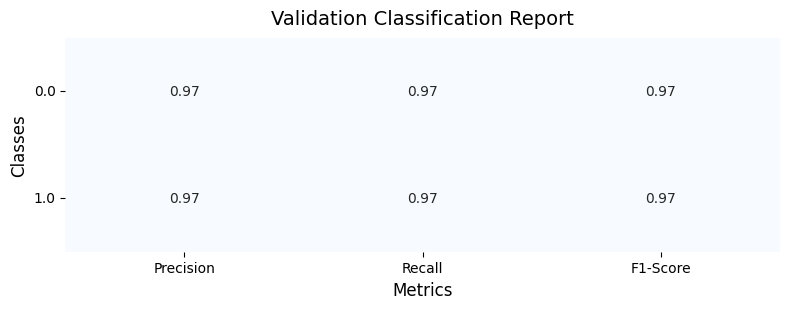

In [138]:
plot_classification_report_from_text(report_text, title='Validation Classification Report')

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_from_csv(csv_path_or_str, title='Confusion Matrix', from_string=False):
    """
    Plots a confusion matrix heatmap from a CSV containing y_true and y_pred.
    
    Parameters:
        csv_path_or_str (str): Path to CSV file or CSV string if from_string=True.
        title (str): Plot title.
        from_string (bool): Set True if passing CSV as string instead of file path.
    """
    # Load CSV
    if from_string:
        from io import StringIO
        df = pd.read_csv(StringIO(csv_path_or_str))
    else:
        df = pd.read_csv(csv_path_or_str)
    
    y_true = df['y_true']
    y_pred = df['y_pred']
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    classes = sorted(list(set(y_true)))
    
    # Plot heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


In [140]:
train_pred_path = os.path.join('..', 'data', '07_model_output', 'lipinski_train_predictions.csv')
val_pred_path = os.path.join('..', 'data', '07_model_output', 'lipinski_val_predictions.csv')

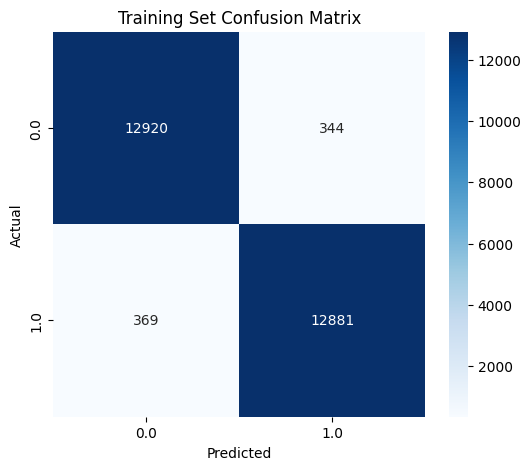

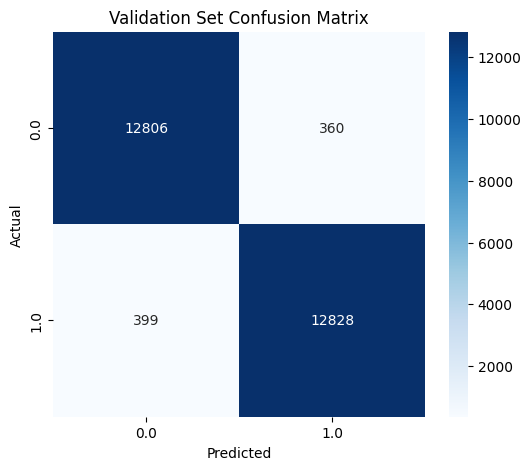

In [141]:
plot_confusion_matrix_from_csv(train_pred_path, title='Training Set Confusion Matrix')
plot_confusion_matrix_from_csv(val_pred_path, title='Validation Set Confusion Matrix')